# MOMI Data Analysis

## EDA

### Loading Required Libraries

In [68]:
# Load required packages
library(readxl)
library(dplyr)
library(tidyr)
library(ggplot2)
library(tibble)
#library(skimr)
library(patchwork)
library(gtsummary)

### Importing MOMI Data

#### 1. Sample Maternal Data

In [69]:
sample_maternal_data <- read_excel("C:/Users/Dell/Desktop/THSTI-CDSA work/MOMI Data Analysis/preg_intensities_sb_stratified_maternal.xlsx", col_types = "text")

sample_maternal_data <- sample_maternal_data %>%
    type.convert(as.is = TRUE)  # Automatically convert to appropriate types

head(sample_maternal_data)    

sample_id,orig_id,site,GA_weeks,molecule,sb_case,non_case,healthy_control,intensity_filled,intensity_fill_log,intensity_fill_log_scaled
<chr>,<chr>,<chr>,<int>,<chr>,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>
11BA0000104,68368,AMANHIB,26,allopregnanolone sulfate/pregnanolone sulfate,FALSE,TRUE,TRUE,16668.36,14.02482,0.6855495
11BA0000201,92320,AMANHIB,35,allopregnanolone sulfate/pregnanolone sulfate,FALSE,TRUE,FALSE,17214.47,14.07133,0.7517230
11BA0000305,63382,AMANHIB,26,allopregnanolone sulfate/pregnanolone sulfate,FALSE,TRUE,FALSE,10544.79,13.36424,-0.2543211
11BA0000405,93307,AMANHIB,26,allopregnanolone sulfate/pregnanolone sulfate,FALSE,TRUE,FALSE,8175.76,12.99714,-0.7766361
11BA0000501,63375,AMANHIB,27,allopregnanolone sulfate/pregnanolone sulfate,FALSE,TRUE,TRUE,23342.64,14.51068,1.3768210
11BA0000601,70317,AMANHIB,25,allopregnanolone sulfate/pregnanolone sulfate,FALSE,TRUE,FALSE,9321.83,13.18640,-0.5073579


In [70]:
cat("Dimesions of Maternal Data:",dim(sample_maternal_data))

Dimesions of Maternal Data: 53582 11

#### 2. Sample cord data

In [71]:
sample_cord_data <- read_excel("C:/Users/Dell/Desktop/THSTI-CDSA work/MOMI Data Analysis/preg_intensities_sb_stratified_cord.xlsx", col_types = "text")

# Convert columns to appropriate types
sample_cord_data <- sample_cord_data %>%
    type.convert(as.is = TRUE)

head(sample_cord_data)

sample_id,orig_id,site,molecule,sb_case,non_case,healthy_control,intensity_filled,intensity_fill_log,intensity_fill_log_scaled
<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>
11CB0000101,106006,AMANHIB,allopregnanolone sulfate/pregnanolone sulfate,FALSE,TRUE,TRUE,14118.23,13.78527,-1.3363408
11CB0000101,106006,AMANHIB,pregnenolone sulfate,FALSE,TRUE,TRUE,25222.12,14.62240,-0.2150055
11CB0000201,107028,AMANHIB,allopregnanolone sulfate/pregnanolone sulfate,FALSE,TRUE,FALSE,14950.39,13.86790,-1.1808550
11CB0000201,107028,AMANHIB,pregnenolone sulfate,FALSE,TRUE,FALSE,33301.87,15.02332,0.3812567
11CB0000301,72274,AMANHIB,allopregnanolone sulfate/pregnanolone sulfate,FALSE,TRUE,TRUE,18505.24,14.17565,-0.6017139
11CB0000301,72274,AMANHIB,pregnenolone sulfate,FALSE,TRUE,TRUE,18637.72,14.18594,-0.8641404


In [72]:
cat("Dimesions of cord Data:",dim(sample_cord_data))

Dimesions of cord Data: 13580 10

#### 3. Clinical Data

In [73]:
clinical_data <- read_excel("C:/Users/Dell/Desktop/THSTI-CDSA work/MOMI Data Analysis/momi_combined_data.xlsx", col_types = "text")

clinical_data <- clinical_data %>%
    type.convert(as.is = TRUE)  # Automatically convert to appropriate types

head(clinical_data)

SITE_CODE,ORIG_ID,PARTICIPANT_ID,PREGNANCY_ID,BABY_ID,VDT_ENR,DATE_LMP,PW_AGE,AGE_CAL,PW_OCCUPATION,⋯,BUN,SCR,AST,ALB,TSH,RPR,SFLT,PLGF,PAPPA,VEGF
<int>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<int>
1,30-000001,ZAPPS-000001,1,ZAPPS-000001-1,42233,42183,27,1,1,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,30-000001,ZAPPS-000001,1,ZAPPS-000001-1,42233,42183,27,1,1,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,30-000001,ZAPPS-000001,1,ZAPPS-000001-1,42233,42183,27,1,1,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,30-000001,ZAPPS-000001,1,ZAPPS-000001-1,42233,42183,27,1,1,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,30-000001,ZAPPS-000001,1,ZAPPS-000001-1,42233,42183,27,1,1,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,30-000002,ZAPPS-000002,1,ZAPPS-000002-1,42233,42183,31,1,1,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [74]:
cat("Dimesions of clinical data:",dim(clinical_data))

Dimesions of clinical data: 105009 122

### Adding Site and GA_weeks in clinical data

#### Adding Site from Site Code

In [75]:
clinical_data <- clinical_data %>%
  mutate(SITE = case_when(
    SITE_CODE == 1 ~ "ZAPPS",
    SITE_CODE == 2 ~ "GAPPSB",
    SITE_CODE == 3 ~ "AMANHIP",
    SITE_CODE == 4 ~ "AMANHIB",
    SITE_CODE == 5 ~ "AMANHIT",
    SITE_CODE == 6 ~ "THSTI",
    TRUE ~ as.character(SITE_CODE)  # Handle any other cases
  ))

  head(clinical_data$SITE)

[1] "ZAPPS" "ZAPPS" "ZAPPS" "ZAPPS" "ZAPPS" "ZAPPS"

In [76]:
# Check for missing values in SITE column
sum(is.na(clinical_data$SITE))

[1] 0

#### Calculating GA_weeks to merge both files

In [77]:
# Add new columns to the clinical_data dataframe
clinical_data <- clinical_data %>%
  mutate(
    VISITDT = as.Date(VISITDT, format = "%Y-%m-%d", origin = "1899-12-30"),
    VDT_ENR = as.Date(VDT_ENR, format = "%Y-%m-%d", origin = "1899-12-30"),
    DATE_LMP = as.Date(DATE_LMP, format = "%Y-%m-%d", origin = "1899-12-30"),
    DATE_USG = as.Date(DATE_USG, format = "%Y-%m-%d", origin = "1899-12-30"),
    
    # Create a unique ID by combining ORIG_ID and SITE
    id = paste(ORIG_ID, SITE, sep = "_"),
    
    # Calculate GA_crl (Gestational Age based on Crown-Rump Length)
    GA_crl = exp(1.684969 + (0.315646 * CRL) - (0.049306 * CRL^2) + 
                 (0.004057 * CRL^3) - (0.000120456 * CRL^4)),
    
    # Calculate GA_hadlock (Gestational Age based on Hadlock formula)
    GA_hadlock = 10.50 + 0.197 * (BPD * FL) + 0.9500 * FL + 0.7300 * BPD,
    
    # Calculate GA_weeks (final gestational age at enrollment)
    GA_weeks = ifelse(is.na(GA_crl), GA_hadlock, GA_crl)
  )

head(clinical_data$GA_weeks)

[1]  8.149844        NA 34.494140 37.876540        NA  8.149844

#### Summary of GA_weeks and its derivatives

In [78]:
clinical_data %>%
  select(CRL, FL, BPD, GA_crl, GA_hadlock, GA_weeks) %>%
  tbl_summary(
    statistic = list(all_continuous() ~ "Median : {median}, IQR: ({p25}, {p75}), Values present: {N_nonmiss}, NA : {N_miss}"),
    missing = "no"
  ) %>%
  as_kable()



|**Characteristic** |                             **N = 105,009**                             |
|:------------------|:-----------------------------------------------------------------------:|
|CRL                |  Median : 4.90, IQR: (3.50, 6.30), Values present: 9,395, NA : 95,614   |
|FL                 |  Median : 4.00, IQR: (2.50, 6.00), Values present: 17,978, NA : 87,031  |
|BPD                |  Median : 5.50, IQR: (3.90, 7.90), Values present: 18,080, NA : 86,929  |
|GA_crl             | Median : 11.65, IQR: (10.40, 12.70), Values present: 9,395, NA : 95,614 |
|GA_hadlock         |     Median : 23, IQR: (18, 31), Values present: 17,969, NA : 87,040     |
|GA_weeks           |     Median : 18, IQR: (13, 28), Values present: 27,226, NA : 77,783     |

## Data cleaning

### Formatting Columns

In [79]:
colnames(clinical_data)
colnames(sample_maternal_data)
colnames(sample_cord_data)

[1] "SITE_CODE"           "ORIG_ID"             "PARTICIPANT_ID"     
  [4] "PREGNANCY_ID"        "BABY_ID"             "VDT_ENR"            
  [7] "DATE_LMP"            "PW_AGE"              "AGE_CAL"            
 [10] "PW_OCCUPATION"       "PW_EDUCATION"        "FMLY_TYP"           
 [13] "HUS_EDUC"            "FMLY_MEMB"           "TYP_HOUSE"          
 [16] "ROOMS_HOUSE"         "HH_ELECTRICITY"      "FUEL_FOR_COOK"      
 [19] "DRINKING_SOURCE"     "TOILET"              "WEALTH_INDEX"       
 [22] "SNIFF_TOBA"          "SNIFF_FREQ"          "SMOKE_HIST"         
 [25] "SMOK_YR"             "SMOK_TYP"            "SMOK_FREQ"          
 [28] "PASSIVE_SMOK"        "ALCOHOL"             "ALCOHOL_FREQ"       
 [31] "GRAVIDITY"           "PARITY"              "PREV_MIS"           
 [34] "PREV_SB"             "PREV_SB_NO"          "PREV_LB"            
 [37] "PREV_PTB"            "PREV_PTB_NO"         "PREV_PTB_MULTI"     
 [40] "PREV_MULTIP"         "PREV_CS"             "ALIVE_CHILD"        
 [43] "BIRTH_INTERVAL"      "CHRON_HTN"           "DIABETES"           
 [46] "TB"                  "THYROID"             "EPILEPSY"           
 [49] "MAT_HEIGHT"          "NUM_FETUS"           "FETAL_ANOMALIES"    
 [52] "DATE_ANOMALY_SCAN"   "CONG_ANOMALIES"      "DEL_DATE"           
 [55] "DEL_TIME"            "DEL_MODE"            "DELIVERY_PLACE"     
 [58] "DELIVERY_CONDBY"     "LABOUR_24"           "ROM_24"             
 [61] "SPONT_LABOUR"        "LABOUR_AUG"          "LABOUR_FEVER"       
 [64] "LIQUOR_CLEAR"        "LABOUR_HTN"          "PREG_OUTCOME"       
 [67] "SINGLE_TWIN"         "BIRTH_OUTCOME"       "BABY_SEX"           
 [70] "BIRTH_WEIGHT"        "BWT_MEASURE_DATE"    "BWT_MEASURE_TIME"   
 [73] "HC_BIRTH"            "HC_MEASURE_DATE"     "HC_MEASURE_TIME"    
 [76] "LENGTH_BIRTH"        "LENGTH_MEASURE_DATE" "LENGTH_MEASURE_TIME"
 [79] "MUAC_BIRTH"          "MUAC_MEASURE_DATE"   "MUAC_MEASURE_TIME"  
 [82] "MAT_DEATH"           "MAT_DEATH_DATE"      "VISITDT"            
 [85] "MAT_WEIGHT"          "SBP"                 "DBP"                
 [88] "TEMP"                "PULSE"               "FUNDAL_HEIGHT"      
 [91] "VAG_BLEED"           "SWELL_ANKLE"         "DATE_USG"           
 [94] "CRL"                 "HC"                  "AC"                 
 [97] "BPD"                 "FL"                  "PPH"                
[100] "LABDT"               "HEMO"                "SYPHILIS"           
[103] "SYPHILIS_METHOD"     "UDIP_PROT"           "HBA1C"              
[106] "HIV"                 "MALARIA"             "MALARIA_METHOD"     
[109] "CRP"                 "AGP"                 "CA"                 
[112] "FER"                 "BUN"                 "SCR"                
[115] "AST"                 "ALB"                 "TSH"                
[118] "RPR"                 "SFLT"                "PLGF"               
[121] "PAPPA"               "VEGF"                "SITE"               
[124] "id"                  "GA_crl"              "GA_hadlock"         
[127] "GA_weeks"

[1] "sample_id"                 "orig_id"                  
 [3] "site"                      "GA_weeks"                 
 [5] "molecule"                  "sb_case"                  
 [7] "non_case"                  "healthy_control"          
 [9] "intensity_filled"          "intensity_fill_log"       
[11] "intensity_fill_log_scaled"

[1] "sample_id"                 "orig_id"                  
 [3] "site"                      "molecule"                 
 [5] "sb_case"                   "non_case"                 
 [7] "healthy_control"           "intensity_filled"         
 [9] "intensity_fill_log"        "intensity_fill_log_scaled"

In [80]:
# Ensure column names match
colnames(sample_maternal_data) <- toupper(colnames(sample_maternal_data))
colnames(clinical_data) <- toupper(colnames(clinical_data))
colnames(sample_cord_data) <- toupper(colnames(sample_cord_data))

# common columns in both maternal and clinical data
common_columns <- intersect(colnames(sample_maternal_data), colnames(clinical_data))
print(common_columns)

[1] "ORIG_ID"  "SITE"     "GA_WEEKS"


### Duplicate rows

In [81]:
# Find duplicate rows based on ORIG_ID, SITE, VISITDT and BABY_ID
duplicate_rows <- clinical_data %>%
  group_by(ORIG_ID, SITE, VISITDT, BABY_ID) %>% 
  filter(n() > 1) %>% # Keep only rows that appear more than once
  ungroup() 

print(duplicate_rows)
cat("Total duplicate rows:", nrow(duplicate_rows), "\n")

# A tibble: 0 × 127
# ℹ 127 variables: SITE_CODE <int>, ORIG_ID <chr>, PARTICIPANT_ID <chr>,
#   PREGNANCY_ID <int>, BABY_ID <chr>, VDT_ENR <date>, DATE_LMP <date>,
#   PW_AGE <int>, AGE_CAL <int>, PW_OCCUPATION <int>, PW_EDUCATION <int>,
#   FMLY_TYP <int>, HUS_EDUC <int>, FMLY_MEMB <int>, TYP_HOUSE <int>,
#   ROOMS_HOUSE <int>, HH_ELECTRICITY <int>, FUEL_FOR_COOK <int>,
#   DRINKING_SOURCE <int>, TOILET <int>, WEALTH_INDEX <int>, SNIFF_TOBA <int>,
#   SNIFF_FREQ <int>, SMOKE_HIST <int>, SMOK_YR <int>, SMOK_TYP <int>, …
Total duplicate rows: 0 
Total duplicate rows: 0 


## Data Distribution

### Calculating Participants

In [82]:
#Unique count of distinct columns (ORIG_ID, SITE) in both data frames
clinical_particip <- clinical_data %>%
  distinct(ORIG_ID, SITE) %>%
  nrow()

maternal_particip <- sample_maternal_data %>%
  distinct(ORIG_ID, SITE) %>%
  nrow()

cord_particip <- sample_cord_data %>%
  distinct(ORIG_ID, SITE) %>%
  nrow()

cat("Participants in clinical data:",clinical_particip,"\n")
cat("Participants in maternal data:",maternal_particip,"\n")
cat("Participants in cord data:",cord_particip,"\n")

Participants in clinical data: 15565 
Participants in maternal data: 14535 
Participants in cord data: 6783 
Participants in maternal data: 14535 
Participants in cord data: 6783 


#### Count of Maternal participants`s clinical data available or not

In [83]:
matching_rows <- suppressMessages(inner_join(
    sample_maternal_data %>% distinct(ORIG_ID, SITE),
    clinical_data %>% distinct(ORIG_ID, SITE),
    relationship = "many-to-many"
) %>% nrow())

# Find records in maternal data that don't match clinical data
maternal_no_match <- suppressMessages(anti_join(
    sample_maternal_data %>% distinct(ORIG_ID, SITE),
    clinical_data %>% distinct(ORIG_ID, SITE)
) %>% nrow())

cat("Participants (clinical data available):",matching_rows,"\n")
cat("Participants those clinical data is not present:", maternal_no_match)

Participants (clinical data available): 13510 
Participants those clinical data is not present: 1025Participants those clinical data is not present: 1025

#### Count of cord participants`s clinical data available or not

In [84]:
matching_rows <- suppressMessages(inner_join(
    sample_cord_data %>% distinct(ORIG_ID, SITE),
    clinical_data %>% distinct(ORIG_ID, SITE),
    relationship = "many-to-many"
) %>% nrow())

# Find records in cord data that don't match clinical data
cord_no_match <- suppressMessages(anti_join(
    sample_cord_data %>% distinct(ORIG_ID, SITE),
    clinical_data %>% distinct(ORIG_ID, SITE)
) %>% nrow())

cat("Participants (clinical data available):", matching_rows, "\n")
cat("Participants whose clinical data is not present:", cord_no_match, "\n")

Participants (clinical data available): 6247 
Participants whose clinical data is not present: 536 
Participants whose clinical data is not present: 536 


#### Participants matching in maternal and cord data

In [85]:
matching_rows <- suppressMessages(inner_join(
    sample_cord_data %>% distinct(ORIG_ID, SITE),
    sample_maternal_data %>% distinct(ORIG_ID, SITE),
    relationship = "many-to-many"
) %>% nrow())

# Find records in cord data that don't match maternal data
maternal_no_match <- suppressMessages(anti_join(
    sample_cord_data %>% distinct(ORIG_ID, SITE),
    sample_maternal_data %>% distinct(ORIG_ID, SITE)
) %>% nrow())

cat("Participants available in both data:",matching_rows,"\n")
cat("Participants (from cord data) not available in maternal data:", maternal_no_match)

Participants available in both data: 6783 
Participants (from cord data) not available in maternal data: 0Participants (from cord data) not available in maternal data: 0

#### Formatting in Table

In [86]:
# Create a data frame
data_table <- data.frame(
  Data = c("Clinical data", "Maternal data", "Cord data"),
  Participants = c(clinical_particip, maternal_particip, cord_particip),
  Rows = c(nrow(clinical_data), nrow(sample_maternal_data), nrow(sample_cord_data)),
  Columns = c(ncol(clinical_data), ncol(sample_maternal_data), ncol(sample_cord_data)),
  stringsAsFactors = FALSE # Avoid automatic factor conversion
)

# Convert the data frame to a tibble
data_table_tibble <- as_tibble(data_table)

# Print the tibble
print(data_table_tibble)

# A tibble: 3 × 4
  Data          Participants   Rows Columns
  <chr>                <int>  <int>   <int>
1 Clinical data        15565 105009     127
2 Maternal data        14535  53582      11
3 Cord data             6783  13580      10


### Discrepancy between clinical and metabolomics datasets

#### Maternal sample data

In [87]:
# Participants in maternal data
total_maternal <- sample_maternal_data %>% distinct(ORIG_ID, SITE) %>% nrow()

# Find records in maternal sample data that don't match clinical data
overall_maternal_no_match <- suppressMessages(anti_join(
    sample_maternal_data %>% distinct(ORIG_ID, SITE),
    clinical_data %>% distinct(ORIG_ID, SITE)
) %>% nrow())

cat("Maternal sample data:", "\n")
cat("Total records in sample_maternal_data:", total_maternal, "\n")
cat("Records not present in clinical_data (Sample only):", overall_maternal_no_match, "\n")

Maternal sample data: 
Total records in sample_maternal_data: 14535 
Records not present in clinical_data (Sample only): 1025 
Total records in sample_maternal_data: 14535 
Records not present in clinical_data (Sample only): 1025 


#### Clinical data

In [88]:
# Participants in clinical data
total_clinical <- clinical_data %>% distinct(ORIG_ID, SITE) %>% nrow()

# Find records in clinical data that don't match maternal sample data
overall_clinical_no_match <- suppressMessages(anti_join(
    clinical_data %>% distinct(ORIG_ID, SITE),
    sample_maternal_data %>% distinct(ORIG_ID, SITE)
) %>% nrow())

cat("Clinical data:", "\n")
cat("Total records in clinical data:", total_clinical, "\n")
cat("Records not present in sample data (Clinical only):", overall_clinical_no_match, "\n")

Clinical data: 
Total records in clinical data: 15565 
Records not present in sample data (Clinical only): 2055 
Total records in clinical data: 15565 
Records not present in sample data (Clinical only): 2055 


#### Sample and clinical

In [89]:
# Find matching records between sample_maternal_data and clinical_data
matching_data <- inner_join(
    sample_maternal_data,
    clinical_data,
    by = c("SITE", "ORIG_ID"),
    relationship = "many-to-many"
)  %>%
distinct(SITE, ORIG_ID)

sample_clinical <- nrow(matching_data)

cat("Matching Data Analysis:\n")
cat("Total matching records:", sample_clinical, "\n")

Matching Data Analysis:
Total matching records: 13510 
Total matching records: 13510 


#### Total 

In [90]:
# full outer join to get total data in Sample and Clinical
total_data <- full_join(
    sample_maternal_data,
    clinical_data,
    by = c("SITE", "ORIG_ID"),
    relationship = "many-to-many"
) %>%
distinct(SITE, ORIG_ID)

# Calculate total matches
total_matches <- nrow(total_data)

# Display matching analysis
cat("Matching Data Analysis:\n")
cat("Total matching records (distinct SITE and ORIG_ID):", total_matches, "\n")

Matching Data Analysis:
Total matching records (distinct SITE and ORIG_ID): 16590 
Total matching records (distinct SITE and ORIG_ID): 16590 


#### Discrepancy BY SITES

In [91]:
# Get unique SITE values
sites <- unique(c(sample_maternal_data$SITE, clinical_data$SITE))

sample_only <- c()
clinical_only <- c()
sample_and_clinical <- c()
total <- c()

# Create analysis for each site
for(site in sites) {
    # Filter data for current site
    maternal_site <- sample_maternal_data %>% 
        filter(SITE == site) %>% 
        distinct(ORIG_ID, SITE)
    
    clinical_site <- clinical_data %>% 
        filter(SITE == site) %>% 
        distinct(ORIG_ID, SITE)
    
    # Calculate statistics
    total_maternal <- nrow(maternal_site)
    total_clinical <- nrow(clinical_site)
    
    # Find unmatched records (suppress join messages)
    maternal_no_match <- suppressMessages(
        anti_join(maternal_site, clinical_site) %>% nrow()
    )
    clinical_no_match <- suppressMessages(
        anti_join(clinical_site, maternal_site) %>% nrow()
    )
    
    # Find matching records (suppress join message)
    matching <- suppressMessages(
        inner_join(maternal_site, clinical_site) %>% nrow()
    )

    # Total distinct records in both datasets
    total_matching <- suppressMessages(
        full_join(maternal_site, clinical_site) %>% nrow())
    
    # Display results for current site
    cat("\nAnalysis for", site, ":\n")
      # Append site only if it is not already in sites
    if (!(site %in% sites)) {
        sites <- c(sites, site)
    }
    cat("Maternal Data:\n")
    cat("Total distinct records:", total_maternal, "\n")
    cat("Records not in clinical data (Sample only):", maternal_no_match, "\n")
    sample_only <- c(sample_only, maternal_no_match)
    
    cat("Clinical Data:\n")
    cat("Total distinct records:", total_clinical, "\n")
    cat("Records not in maternal data (Clinical only):", clinical_no_match, "\n")
    clinical_only <- c(clinical_only, clinical_no_match)
    
    cat("Matching Records (Sample and Clinical):", matching, "\n")
    sample_and_clinical <- c(sample_and_clinical, matching)
    cat("TOtal distinct records in both Sample and Clinical:", total_matching, "\n")
    total <- c(total, total_matching)
    cat("----------------------------------------\n")
}


Analysis for AMANHIB :
Maternal Data:
Total distinct records: 2553 
Records not in clinical data (Sample only): 0 
Clinical Data:
Total distinct records: 3000 
Records not in maternal data (Clinical only): 447 
Matching Records (Sample and Clinical): 2553 
TOtal distinct records in both Sample and Clinical: 3000 
----------------------------------------

Analysis for AMANHIP :
Maternal Data:
Total distinct records: 2342 
Records not in clinical data (Sample only): 0 
Clinical Data:
Total distinct records: 2500 
Records not in maternal data (Clinical only): 158 
Matching Records (Sample and Clinical): 2342 
TOtal distinct records in both Sample and Clinical: 2500 
----------------------------------------

Analysis for GAPPSB :
Maternal Data:
Total distinct records: 3522 
Records not in clinical data (Sample only): 0 
Clinical Data:
Total distinct records: 3644 
Records not in maternal data (Clinical only): 122 
Matching Records (Sample and Clinical): 3522 
TOtal distinct records in bot

#### Formatting in Table

In [92]:
# Create a data frame using the vectors
data_table <- data.frame(
  sites = c(sites, "OVERALL"),
  sample_only = c(sample_only, overall_maternal_no_match),
  clinical_only = c(clinical_only, overall_clinical_no_match),
  sample_and_clinical = c(sample_and_clinical, sample_clinical),
  total = c(total, total_matches)
)

# Convert the data frame to a tibble
data_table_tibble <- as_tibble(data_table)

# Print the tibble
print(data_table_tibble)

# A tibble: 7 × 5
  sites   sample_only clinical_only sample_and_clinical total
  <chr>         <int>         <int>               <int> <int>
1 AMANHIB           0           447                2553  3000
2 AMANHIP           0           158                2342  2500
3 GAPPSB            0           122                3522  3644
4 AMANHIT           0           455                4046  4501
5 ZAPPS          1025           403                1047  2475
6 THSTI             0           470                   0   470
7 OVERALL        1025          2055               13510 16590


### Visit wise clinical data distribution

In [93]:
# Find duplicate rows based on ORIG_ID, SITE, and VISITDT
duplicate_rows <- clinical_data %>%
  group_by(ORIG_ID, SITE, VISITDT, BABY_ID) %>% # Group by the unique key columns
  filter(n() > 1) %>% # Keep only rows that appear more than once
  ungroup() %>% # Remove grouping
  select(ORIG_ID, SITE, VISITDT, BABY_ID) # Select only the relevant columns

# Print the duplicate rows
print(duplicate_rows)

# A tibble: 0 × 4
# ℹ 4 variables: ORIG_ID <chr>, SITE <chr>, VISITDT <date>, BABY_ID <chr>


#### Adding Visit column in Clinical Data

In [94]:
# Add a visit_number column to clinical_data
clinical_data <- clinical_data %>%
  select(ORIG_ID, SITE, VISITDT, BABY_ID, everything()) %>% # Ensure VISITDT is included
  group_by(ORIG_ID, SITE, BABY_ID) %>% # Group by unique key columns
  arrange(VISITDT, .by_group = TRUE) %>% # Arrange VISITDT in ascending order for each group
  mutate(visit_number = row_number()) %>% # Assign visit numbers based on the order of VISITDT
  ungroup() # Remove grouping

In [95]:
# Initialize an empty list to store visit statistics
visit <- list()

# Loop through visits 1 to 4
for (i in 1:4) {
  # Filter data for the current visit
  visits <- clinical_data %>% filter(visit_number == i)
  
  # Print the number of participants for the current visit
  cat("Visit", i, ":", nrow(visits), "\n")
  
  # If there are no rows for the current visit, skip the statistics calculation
  if (nrow(visits) == 0) {
    visit[[i]] <- list(
      participants = 0,
      min_max = "No data",
      mean_sd = "No data",
      median_iqr = "No data"
    )
    next
  }
  
  # Calculate statistics for GA_WEEKS
  min_val <- min(visits$GA_WEEKS, na.rm = TRUE)
  max_val <- max(visits$GA_WEEKS, na.rm = TRUE)
  mean_val <- mean(visits$GA_WEEKS, na.rm = TRUE)
  sd_val <- sd(visits$GA_WEEKS, na.rm = TRUE)
  median_val <- median(visits$GA_WEEKS, na.rm = TRUE)
  q1 <- quantile(visits$GA_WEEKS, 0.25, na.rm = TRUE) # 25th percentile
  q3 <- quantile(visits$GA_WEEKS, 0.75, na.rm = TRUE) # 75th percentile
  
  # Store statistics in the desired format
  visit[[i]] <- list(
    participants = nrow(visits),
    min_max = paste(round(min_val, 0), round(max_val, 0), sep = ", "),
    mean_sd = paste(round(mean_val, 0), "(", round(sd_val, 0), ")", sep = ""),
    median_iqr = paste(round(median_val, 0), "(", round(q1, 0), "-", round(q3, 0), ")", sep = "")
  )
}

Visit 1 : 15780 
Visit 2 : 15487 
Visit 3 : 15269 
Visit 4 : 14934 


#### Formatting in Table

In [96]:
# Initialize the data frame with the first column
data_table <- data.frame(
  total = c("Participants (N)", "GA (WEEKS) MIN, MAX", "GA WEEKS Mean(SD)", "GA WEEKS Median (IQR)")
)

# Loop through the visits and add columns dynamically
for (i in 1:4) {
  if (!is.null(visit[[i]])) {
    data_table[[paste0("visit", i)]] <- c(
      visit[[i]]$participants, # Number of participants
      visit[[i]]$min_max, # Min, Max
      visit[[i]]$mean_sd, # Mean(SD)
      visit[[i]]$median_iqr # Median(IQR)
    )
  } else {
    data_table[[paste0("visit", i)]] <- c("No data", "No data", "No data", "No data")
  }
}

# Convert the data frame to a tibble
data_table_tibble <- as_tibble(data_table)

# Print the tibble
print(data_table_tibble)

# A tibble: 4 × 5
  total                 visit1    visit2    visit3    visit4   
  <chr>                 <chr>     <chr>     <chr>     <chr>    
1 Participants (N)      15780     15487     15269     14934    
2 GA (WEEKS) MIN, MAX   6, 29     6, 36     6, 37     9, 39    
3 GA WEEKS Mean(SD)     14(3)     18(5)     28(5)     32(3)    
4 GA WEEKS Median (IQR) 13(11-16) 21(14-22) 29(27-31) 32(31-33)


### Distribution of GA by Visit

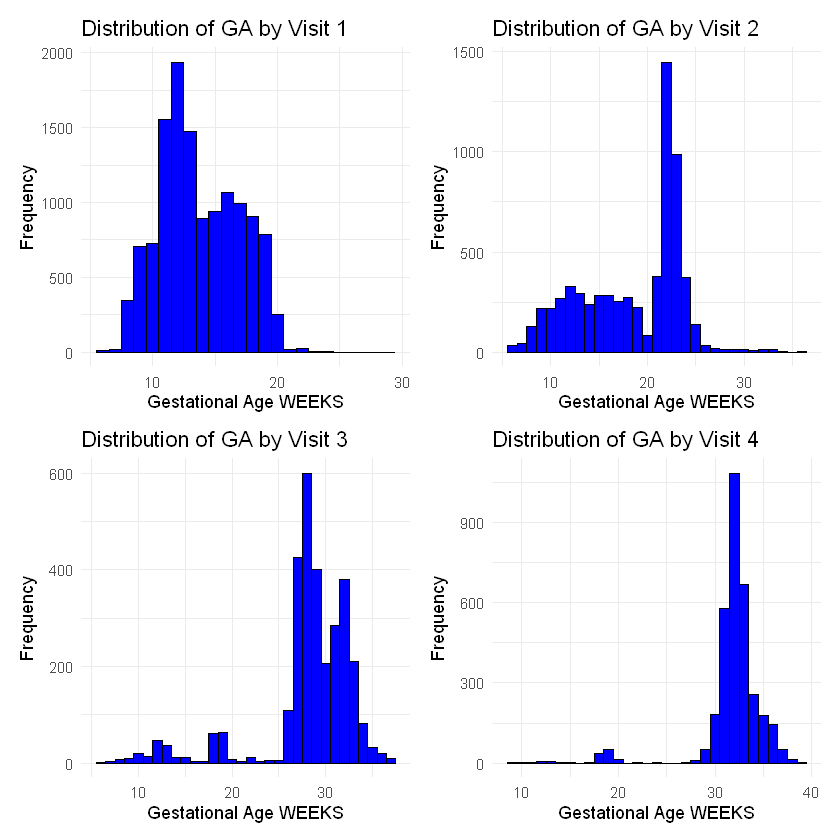

In [97]:
plots <- list()

for (i in 1:4) {
  visit <- clinical_data %>% filter(visit_number == i, !is.na(GA_WEEKS))
  
  p <- ggplot(data = visit, aes(x = GA_WEEKS)) +
    geom_histogram(binwidth = 1, fill = "blue", color = "black") +
    labs(
      title = paste("Distribution of GA by Visit", i),
      x = "Gestational Age WEEKS",
      y = "Frequency"
    ) +
    theme_minimal()
  
  # Add the plot to the list
  plots[[i]] <- p
}

# Combine all plots using patchwork
combined_plot <- plots[[1]] + plots[[2]] + plots[[3]] + plots[[4]] + 
  plot_layout(ncol = 2) # Arrange plots in 2 columns

print(combined_plot)

### Trimester wise maternal sample distribution

#### Adding Trimester Column

In [108]:
# Add a trimester column to clinical_data
clinical_data <- clinical_data %>%
  mutate(
    TRIMESTER = case_when(
      is.na(GA_WEEKS) ~ NA_integer_,  # Handle missing values
      GA_WEEKS < 14 ~ 1,  # First trimester
      GA_WEEKS < 28 ~ 2,  # Second trimester
      TRUE ~ 3            # Third trimester
    )
  )

# Display the first few rows to verify
head(clinical_data$TRIMESTER)

[1] NA  2 NA NA NA NA

In [109]:
clinical_data %>%
  select(GA_WEEKS, TRIMESTER) %>%
  head()

GA_WEEKS,TRIMESTER
<dbl>,<dbl>
NA,NA
17.06247,2
NA,NA
NA,NA
NA,NA
NA,NA


## Removing NA values

In [72]:
columns <- c("ORIG_ID", "SITE", "GA_WEEKS")

for(col in columns) {
    cat("NA count in", col, ":", sum(is.na(clinical_data[[col]])), "\n")
}

NA count in ORIG_ID : 0 
NA count in SITE : 0 
NA count in GA_WEEKS : 77783 


In [ ]:
# Store original dimensions
orig_dim <- dim(clinical_data)

# Filter out rows with missing values in key columns
clinical_data <- clinical_data %>%
  filter(!is.na(GA_WEEKS))

# Display filtering results
cat("Original dimensions:", orig_dim[1], "rows,", orig_dim[2], "columns\n")
cat("After filtering:", nrow(clinical_data), "rows,", ncol(clinical_data), "columns\n")
cat("Rows removed:", orig_dim[1] - nrow(clinical_data), "\n")

# Verify no missing values in key columns
cat("\nMissing values:\n")
cat("GA_WEEKS:", sum(is.na(clinical_data$GA_WEEKS)), "\n")

Original dimensions: 27226 rows, 127 columns
After filtering: 27226 rows, 127 columns
Rows removed: 0 

Missing values:
GA_WEEKS: 0 


In [ ]:
columns <- c("ORIG_ID", "SITE", "GA_WEEKS")

for(col in columns) {
    cat("NA count in", col, ":", sum(is.na(clinical_data[[col]])), "\n")
}

NA count in ORIG_ID : 0 
NA count in SITE : 0 
NA count in GA_WEEKS : 0 


## Merging clinical and sample data

#### Changing Data Types of both Dataframes

In [ ]:
# Check data types
cat("Sample data:\n")
cat("ORIG_ID types:", class(sample_maternal_data$ORIG_ID), "\n")
cat("SITE types:", class(sample_maternal_data$SITE), "\n")
cat("GA_WEEKS types:", class(sample_maternal_data$GA_WEEKS), "\n")

cat("\nClinical data:\n")
cat("ORIG_ID types:", class(clinical_data$ORIG_ID), "\n")
cat("SITE types:", class(clinical_data$SITE), "\n")
cat("GA_WEEKS types:", class(clinical_data$GA_WEEKS), "\n")

Sample data:


Warning message:
"Unknown or uninitialised column: `ORIG_ID`."


ORIG_ID types: NULL 


Warning message:
"Unknown or uninitialised column: `SITE`."


SITE types: NULL 


Warning message:
"Unknown or uninitialised column: `GA_WEEKS`."


GA_WEEKS types: NULL 

Clinical data:
ORIG_ID types: character 
SITE types: character 
GA_WEEKS types: numeric 


In [ ]:
# Convert columns to same type in both dataframes
sample_maternal_data <- sample_maternal_data %>%
  mutate(
    ORIG_ID = as.character(ORIG_ID),
    SITE = as.character(SITE),
    GA_WEEKS = as.numeric(GA_WEEKS)
  )

clinical_data <- clinical_data %>%
  mutate(
    ORIG_ID = as.character(ORIG_ID),
    SITE = as.character(SITE),
    GA_WEEKS = as.numeric(GA_WEEKS)
  )

  # Check data types
cat("Sample data:\n")
cat("ORIG_ID types:", class(sample_maternal_data$ORIG_ID), "\n")
cat("SITE types:", class(sample_maternal_data$SITE), "\n")
cat("GA_WEEKS types:", class(sample_maternal_data$GA_WEEKS), "\n")

cat("\nClinical data:\n")
cat("ORIG_ID types:", class(clinical_data$ORIG_ID), "\n")
cat("SITE types:", class(clinical_data$SITE), "\n")
cat("GA_WEEKS types:", class(clinical_data$GA_WEEKS), "\n")

ERROR: [1m[33mError[39m in `mutate()`:[22m
[1m[22m[36mℹ[39m In argument: `ORIG_ID = as.character(ORIG_ID)`.
[1mCaused by error:[22m
[33m![39m object 'ORIG_ID' not found


#### Removing Unwanted spaces

In [ ]:
# Check for any case differences or leading/trailing spaces
clinical_data <- clinical_data %>%
  mutate(
    ORIG_ID = trimws(ORIG_ID),
    SITE = trimws(SITE),
    GA_WEEKS = round(GA_WEEKS, 2)  # Round to 2 decimal places
  )

sample_maternal_data <- sample_maternal_data %>%
  mutate(
    ORIG_ID = trimws(ORIG_ID),
    SITE = trimws(SITE),
    GA_WEEKS = round(GA_WEEKS, 2)  # Round to 2 decimal places
  )

#### Left Join

In [ ]:
dim(clinical_data)

[1] 27226   127

In [ ]:
# Perform left join
leftjoin_data <- merge(
    x = clinical_data,
    y = sample_maternal_data,
    by = c("ORIG_ID", "SITE", "GA_WEEKS"),
    all.x = TRUE    # Keep all rows from clinical_data
)

# Display dimensions and summary
cat("Dimensions of datasets:\n")
cat("Clinical data:", dim(clinical_data), "\n")
cat("Sample maternal data:", dim(sample_maternal_data), "\n")
cat("Merged data:", dim(leftjoin_data), "\n")

Dimensions of datasets:
Clinical data: 27226 127 
Sample maternal data: 53582 11 
Merged data: 27412 135 


In [ ]:
cat("NA values in SB_CASE in maternal data:", sum(is.na(sample_maternal_data$SB_CASE)), "\n")

NA values in SB_CASE in maternal data: 0 


In [ ]:
cat("Total rows:", nrow(leftjoin_data), "\n")
cat("NA values in merged data in SB_CASE:", sum(is.na(leftjoin_data$SB_CASE)), "\n")
cat("Non-NA values in merged data in SB_CASE:", nrow(leftjoin_data) - sum(is.na(leftjoin_data$SB_CASE)), "\n")

Total rows: 27412 
NA values in merged data in SB_CASE: 27040 
Non-NA values in merged data in SB_CASE: 372 


#### Inner Join

In [ ]:
# Perform inner join to get only matching records
matched_data <- inner_join(clinical_data,sample_maternal_data,
                by = c("ORIG_ID", "SITE", "GA_WEEKS"))

# Display dimensions and summary
cat("Dimensions of datasets:\n")
cat("Clinical data:", dim(clinical_data), "\n")
cat("Sample maternal data:", dim(sample_maternal_data), "\n")
cat("Matched data:", dim(matched_data), "\n")

head(matched_data)

Dimensions of datasets:
Clinical data: 27226 127 
Sample maternal data: 53582 11 
Matched data: 372 135 


SITE_CODE,ORIG_ID,PARTICIPANT_ID,PREGNANCY_ID,BABY_ID,VDT_ENR,DATE_LMP,PW_AGE,AGE_CAL,PW_OCCUPATION,⋯,GA_HADLOCK,GA_WEEKS,SAMPLE_ID,MOLECULE,SB_CASE,NON_CASE,HEALTHY_CONTROL,INTENSITY_FILLED,INTENSITY_FILL_LOG,INTENSITY_FILL_LOG_SCALED
<int>,<chr>,<chr>,<int>,<chr>,<date>,<date>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<chr>,<chr>,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>,<dbl>
1,30-000044,ZAPPS-000044,1,ZAPPS-000044-1,2015-09-11,2015-07-15,31,1,0,⋯,NA,8,30-00389-06,allopregnanolone sulfate/pregnanolone sulfate,FALSE,TRUE,FALSE,7750,12.91998,-0.3808195970
1,30-000044,ZAPPS-000044,1,ZAPPS-000044-1,2015-09-11,2015-07-15,31,1,0,⋯,NA,8,30-00389-06,pregnenolone sulfate,FALSE,TRUE,FALSE,1099,10.10198,-0.5979207688
1,30-000048,ZAPPS-000048,1,ZAPPS-000048-1,2015-09-14,2015-07-20,29,1,1,⋯,NA,8,30-00370-05,allopregnanolone sulfate/pregnanolone sulfate,FALSE,TRUE,TRUE,10461,13.35273,-0.0017304196
1,30-000048,ZAPPS-000048,1,ZAPPS-000048-1,2015-09-14,2015-07-20,29,1,1,⋯,NA,8,30-00370-05,pregnenolone sulfate,FALSE,TRUE,TRUE,1864,10.86419,-0.0004796354
1,30-000230,ZAPPS-000230,1,ZAPPS-000230-1,2016-02-08,2015-10-13,30,1,NA,⋯,32.0012,32,30-06109-05,allopregnanolone sulfate/pregnanolone sulfate,FALSE,TRUE,FALSE,3402,11.73217,-1.4213382783
1,30-000230,ZAPPS-000230,1,ZAPPS-000230-1,2016-02-08,2015-10-13,30,1,NA,⋯,32.0012,32,30-06109-05,pregnenolone sulfate,FALSE,TRUE,FALSE,985,9.94398,-0.7217621055
